In [3]:
using DataFrames
using Statistics
using CSV

data=readtable("result3.csv")
df3=by(data,:size,AVG_N = :time_naive => mean,STD_N = :time_naive => std , AVG_B = :time_better => mean,STD_B = :time_better => std , AVG_G = :time_gsl => mean , STD_G = :time_gsl => std)



,size,AVG_N,STD_N,AVG_B,STD_B,AVG_G,STD_G
,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64
1,100,5.35844e6,1.29472e6,5.09537e6,4.72879e5,1.11226e6,1.13887e6
2,150,1.43636e7,1.403e6,1.3954e7,8.24581e5,2.04829e6,1.14334e5
3,200,3.4479e7,477947.0,3.19096e7,1.77136e5,4.77242e6,8560.85
4,250,6.7839e7,97136.3,6.18392e7,76731.4,9.17478e6,42930.9
5,300,1.17481e8,2.62502e5,1.07687e8,3.43236e6,1.57292e7,2.97289e5
6,350,1.86882e8,2.62657e5,1.68896e8,1.21911e5,2.47328e7,1.02708e5
7,400,3.09791e8,9.10116e6,2.52995e8,1.80631e6,3.80566e7,1.95678e6
8,450,4.39919e8,3.01521e7,3.67372e8,1.57322e7,5.60198e7,5.57778e6
9,500,5.88571e8,1.17118e5,4.90875e8,4.78874e5,7.12513e7,67093.2


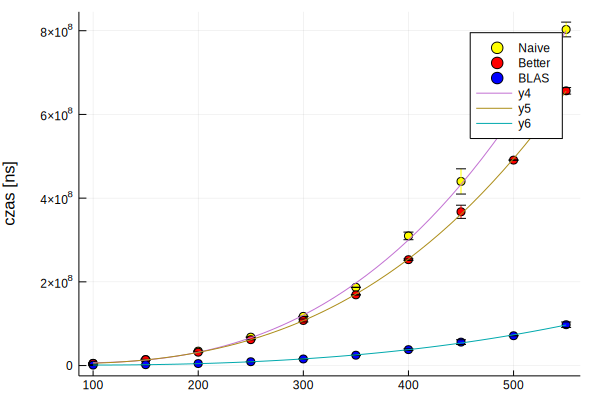

In [4]:
using Plots
using Polynomials

scatter!(df3[:size],[df3[:AVG_N],df3[:AVG_B],df3[:AVG_G]],colour = [:yellow :red :blue],label=["Naive" "Better" "BLAS"],ylabel="czas [ns]",yerr=[df3[:STD_N] df3[:STD_B] df3[:STD_G]])
fitNaive=polyfit(df3[:size],df3[:AVG_N],3)
fitBetter=polyfit(df3[:size],df3[:AVG_B],3)
fitBLAS=polyfit(df3[:size],df3[:AVG_G],3)
xd=100:10:550
plot!(xd, polyval(fitNaive, xd))
plot!(xd, polyval(fitBetter,xd))
plot!(xd,polyval(fitBLAS,xd))


In [4]:
fitNaive

Poly(1.8216191152120616e7 - 203522.8530831342*x + 445.2705881818063*x^2 + 4.564486305982914*x^3)

In [5]:
fitBetter

Poly(8.498915182726558e6 - 103303.55625446154*x + 381.6079975757415*x^2 + 3.5379965017871142*x^3)

In [6]:
fitBLAS

Poly(3.155737114545333e6 - 37592.226240869124*x + 133.95185212120907*x^2 + 0.4445234175602198*x^3)